In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import string
import nltk
import squarify
import pygal
# from /kaggle/input/data-analyst-jobs/DataAnalyst.csv
df=pd.read_csv('DataAnalyst.csv')
#df=df.dropna(axis=1)
df=df.dropna(axis=0)
df=df.drop(['Unnamed: 0'], axis = 1)
df=df.drop(['Easy Apply'], axis = 1)
df=df.drop(['Competitors'], axis = 1)
#To remove NaN rows, if any
nan_df=df[df.isna().any(axis=1)]
nan_df.head()
# No NaN 
df.head(3)

,Job_Title,Salary Estimate,Job_Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable


In [39]:
df.shape

(2252, 13)

2252 Rows and 13 Columns

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job_Title          2252 non-null   object 
 1   Salary Estimate    2252 non-null   object 
 2   Job_Description    2252 non-null   object 
 3   Rating             2252 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2252 non-null   object 
 6   Headquarters       2252 non-null   object 
 7   Size               2252 non-null   object 
 8   Founded            2252 non-null   int64  
 9   Type of ownership  2252 non-null   object 
 10  Industry           2252 non-null   object 
 11  Sector             2252 non-null   object 
 12  Revenue            2252 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 246.3+ KB


In [41]:
df.isnull().sum()

Job_Title            0
Salary Estimate      0
Job_Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64

In [3]:
df['Type of ownership'].unique()
df=df.replace({'Type of ownership':'-1'}, {'Type of ownership':'Unknown'})
df['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Private',
       'Subsidiary or Business Segment', 'Company - Public', 'Hospital',
       'Unknown', 'Contract', 'Government', 'School / School District',
       'Other Organization', 'College / University', 'Self-employed',
       'Private Practice / Firm', 'Franchise'], dtype=object)

1. JOB TITLES OF A DATA ANALYST

In [4]:
df['Job_Title'].unique()

array(['Data Analyst, Center on Immigration and Justice (CIJ)',
       'Quality Data Analyst',
       'Senior Data Analyst, Insights & Analytics Team [Customer Operations]',
       ..., 'Senior Data Analyst (Corporate Audit)',
       'Technical Business Analyst (SQL, Data analytics, ETL)',
       'Senior Quality Data Analyst'], dtype=object)

In [7]:
df['Company Name'].unique()
df[df["Company Name"].isnull()]
df.fillna(-1,inplace=True)
df["Company Name"]=df["Company Name"].str.replace("(\n).*","")
df['Company Name'].unique()

<ipython-input-7-8fa834b82a0d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Company Name"]=df["Company Name"].str.replace("(\n).*","")


array(['Vera Institute of Justice', 'Visiting Nurse Service of New York',
       'Squarespace', ..., 'Arrow Electronics',
       'Contingent Network Services', 'SCL Health'], dtype=object)

2. JOB SECTORS AVAILABLE FOR A DATA ANALYST

In [5]:
df["Sector"].unique()

array(['Non-Profit', 'Health Care', 'Information Technology',
       'Arts, Entertainment & Recreation', 'Finance', 'Insurance',
       'Business Services', '-1', 'Restaurants, Bars & Food Services',
       'Media', 'Accounting & Legal', 'Real Estate', 'Government',
       'Retail', 'Consumer Services', 'Biotech & Pharmaceuticals',
       'Education', 'Construction, Repair & Maintenance',
       'Oil, Gas, Energy & Utilities', 'Manufacturing',
       'Aerospace & Defense', 'Telecommunications',
       'Transportation & Logistics', 'Mining & Metals',
       'Travel & Tourism'], dtype=object)

3. JOB SECTOR REPRESENTATION USING WORD CLOUD

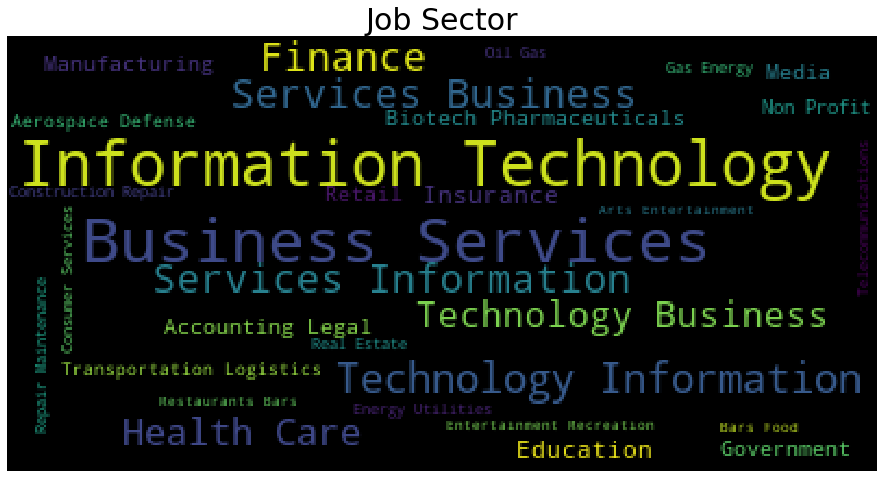

In [2]:
from wordcloud import WordCloud,STOPWORDS
text=' '.join(df['Sector'])
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='black',stopwords=stopwords).generate(text)
plt.figure(figsize=(20,8))
plt.title('Job Sector', fontsize=30)
plt.axis('off')
plt.imshow(wc)
plt.show()

4. COMPANY REVENUE - BAR CHART 

In [3]:
df['Revenue'].unique()
df=df.replace({'Revenue':'-1'}, {'Revenue':'Unknown'})
df['Revenue'].unique()

array(['$100 to $500 million (USD)', '$2 to $5 billion (USD)',
       'Unknown / Non-Applicable', '$50 to $100 million (USD)',
       '$1 to $2 billion (USD)', '$5 to $10 billion (USD)',
       '$1 to $5 million (USD)', '$25 to $50 million (USD)',
       '$10+ billion (USD)', 'Less than $1 million (USD)',
       '$10 to $25 million (USD)', 'Unknown',
       '$500 million to $1 billion (USD)', '$5 to $10 million (USD)'],
      dtype=object)

5. TOP 10 LOCATIONS BASED ON TOTAL NO OF EMPLOYEES (BAR CHART REPRESENTATION)

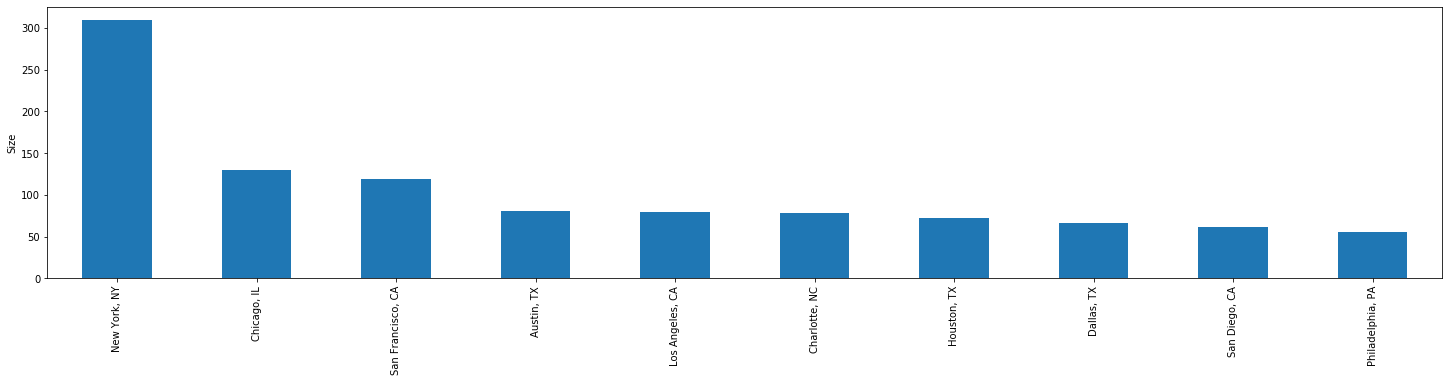

In [4]:
df['Location'].value_counts().sort_values(ascending=False).head(n=10).plot.bar(figsize=(25,5),ylabel="Size");

In [5]:
df["Salary Estimate"].unique()

array(['$37K-$66K (Glassdoor est.)', '$46K-$87K (Glassdoor est.)',
       '$51K-$88K (Glassdoor est.)', '$51K-$87K (Glassdoor est.)',
       '$59K-$85K (Glassdoor est.)', '$43K-$76K (Glassdoor est.)',
       '$60K-$110K (Glassdoor est.)', '$41K-$78K (Glassdoor est.)',
       '$45K-$88K (Glassdoor est.)', '$73K-$127K (Glassdoor est.)',
       '$84K-$90K (Glassdoor est.)', '$27K-$52K (Glassdoor est.)',
       '$42K-$74K (Glassdoor est.)', '$77K-$132K (Glassdoor est.)',
       '$98K-$114K (Glassdoor est.)', '$48K-$96K (Glassdoor est.)',
       '$26K-$47K (Glassdoor est.)', '$31K-$59K (Glassdoor est.)',
       '$47K-$81K (Glassdoor est.)', '$43K-$69K (Glassdoor est.)',
       '$49K-$112K (Glassdoor est.)', '$30K-$54K (Glassdoor est.)',
       '$55K-$103K (Glassdoor est.)', '$37K-$70K (Glassdoor est.)',
       '$57K-$103K (Glassdoor est.)', '$35K-$45K (Glassdoor est.)',
       '$42K-$66K (Glassdoor est.)', '$65K-$81K (Glassdoor est.)',
       '$113K-$132K (Glassdoor est.)', '$42K-$63K (Glas

In [6]:
df['Salary_From']=df["Salary Estimate"].str.extractall(r"[$](\d+)").xs(0,level='match')
df['Salary_To']=df["Salary Estimate"].str.extractall(r"[$](\d+)").xs(1,level='match')
df.fillna(-1,inplace=True)
df['Salary_From']=df['Salary_From'].astype(int)
df['Salary_To']=df['Salary_To'].astype(int)
df['Average_Salary']=(df['Salary_To']+df["Salary_From"]/2)
df['Salary_From'] = df['Salary_From'].astype(float)
df['Salary_To'] = df['Salary_To'].astype(float)
df['Average_Salary'] = df['Average_Salary'].astype(float)
df1=df
df.head()

,Job_Title,Salary Estimate,Job_Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary_From,Salary_To,Average_Salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37.0,66.0,84.5
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37.0,66.0,84.5
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37.0,66.0,84.5
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37.0,66.0,84.5
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37.0,66.0,84.5


6. SALARY RANGE OFFERED BY COMPANIES (Distribution Plot)

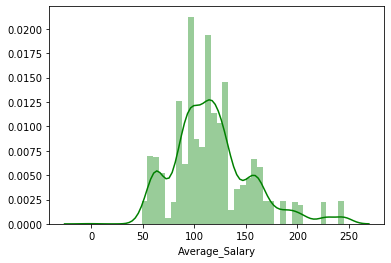

In [7]:
sns.distplot(df['Average_Salary'],color='g')
plt.show()

7. UNIQUE AVERAGE SALARY RANGE 

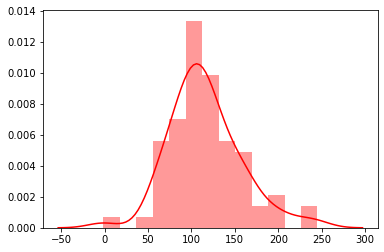

In [8]:
arr1=df['Average_Salary'].unique()
sns.distplot([arr1],color='r')
plt.show()

In [9]:
df['Salary_From'].unique()

array([ 37.,  46.,  51.,  59.,  43.,  60.,  41.,  45.,  73.,  84.,  27.,
        42.,  77.,  98.,  48.,  26.,  31.,  47.,  49.,  30.,  55.,  57.,
        35.,  65., 113.,  67.,  97.,  68.,  29.,  74.,  53.,  38.,  64.,
        50.,  76.,  34.,  24.,  44., 110.,  89.,  69.,  58.,  63.,  40.,
        28.,  54.,  99.,  93.,  82.,  -1.,  32.,  36.,  78.])

8. TOP 15 JOB LOCATIONS (PIE CHART REPRESENTATION)

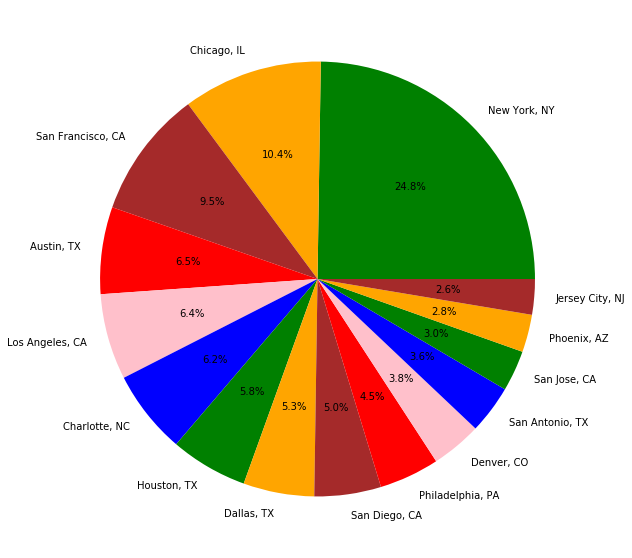

In [10]:
df_jobs = df.Location.value_counts().sort_values(ascending=False).head(n=15)
fig, axs=plt.subplots(nrows=1, ncols=1, figsize=(10,10))
df_jobs.plot.pie(autopct="%.1f%%",ylabel="",   colors = ["green","orange", "brown",'red', 'pink',"blue" ])

In [1]:
df['Job_Description'].unique()n

SyntaxError: invalid syntax (<ipython-input-1-88a64e0f2355>, line 1)

9. COMPANY SIZE (NO. OF EMPLOYEES HIRED) BAR PLOT 

In [11]:
df['Size'].unique()
df=df.replace({'Size':'-1'},{'Size':'Unknown'})
df['Size'].unique()

array(['201 to 500 employees', '10000+ employees',
       '1001 to 5000 employees', '501 to 1000 employees',
       '5001 to 10000 employees', '1 to 50 employees',
       '51 to 200 employees', 'Unknown'], dtype=object)

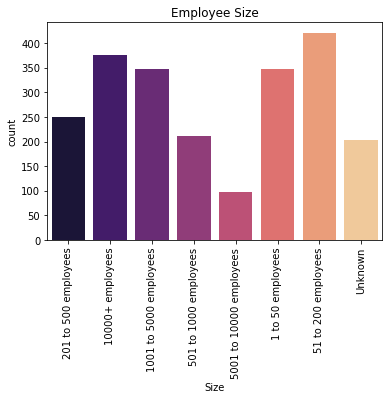

In [12]:
ax=sns.countplot(x = 'Size',  data = df, palette = 'magma')
plt.title('Employee Size')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

10. TREEMAP

(0.0, 100.0, 0.0, 100.0)

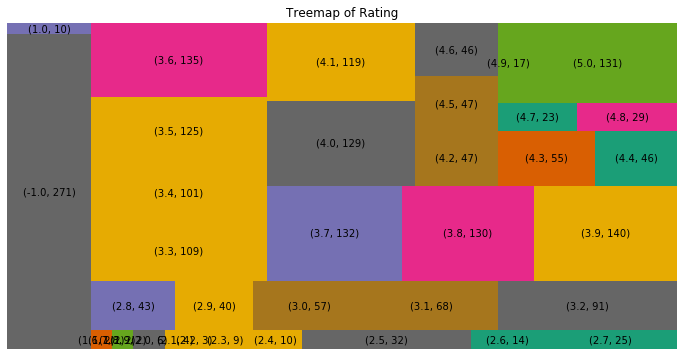

In [114]:
df.tail()
locn_counts=df.groupby('Rating').size().reset_index(name='counts')
locn_counts
sizes=locn_counts.counts.to_list()
np.random.seed(seed=12345)
color=plt.cm.Dark2(np.random.rand(len(sizes)))
label=list(zip(locn_counts.Rating,locn_counts.counts))
plt.figure(figsize=(12,6))
squarify.plot(sizes=sizes,
              color=color,
              label=label,
              pad=False)
plt.title('Treemap of Rating')
plt.axis('off')

11. SKILLS REQUIRED 

In [ ]:
# create a list of skills and check in job descriptions, represent using Barchart

[nltk_data] Downloading package punkt to /home/kpsc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kpsc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


x 0            center
1       immigration
2           justice
3               cij
4           quality
           ...     
4186            etl
4187       customer
4188     experience
4189         senior
4190        quality
Length: 4191, dtype: object
                0
0          center
1     immigration
2         justice
3             cij
4         quality
...           ...
4186          etl
4187     customer
4188   experience
4189       senior
4190      quality

[4191 rows x 1 columns]
After adding column name
      Description
0          center
1     immigration
2         justice
3             cij
4         quality
...           ...
4186          etl
4187     customer
4188   experience
4189       senior
4190      quality

[4191 rows x 1 columns]


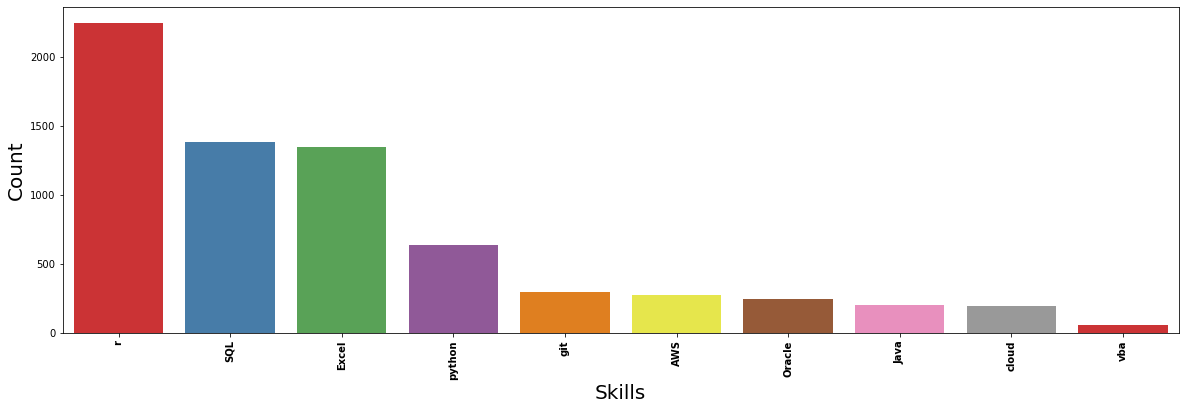

In [112]:
import nltk
nltk.download('punkt')
import re
import string
from collections import Counter
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
del_words= set((stopwords) + list(string.punctuation)+ list(string.digits))
#skills_reqd=df[df['Job_Title']!='-1']['Job_Title'].tolist()
skills_reqd=df['Job_Title'].tolist()
wlist=[]
for item in skills_reqd:
    content=nltk.word_tokenize(item)
    for word in content:
        if word.lower() not in del_words and word.lower()!='data' and word.lower()!= 'analyst' and word.lower()!= 'data analyst':
            wlist.append(word.lower())
            #freq=nltk.FreqDist(wlist)
            #plt.figure(figsize=(10,4))
            #freq.plot(20)
            #plt.show()
skills=['science','ibm','python','r','management','business','cloud','.net','tableau','microsoft','sql','oracle','excel','java','tensorflow','aws','sas','vba','matlab','linux','cassandra','git','sas','big data']

ar1=np.array(wlist)
ar2=np.array(skills)
#print(wlist)


x=pd.Series(ar1)
print("x",x)
df5=pd.DataFrame(ar2)
df5['Count']=0
df5.rename(columns={ df5.columns[0]: "Skills" })
#print(df5)
df6=pd.DataFrame(ar1)
print(df6)
print("After adding column name")
df6.columns =['Description'] 
skills=['science','ibm','python','aws','r','management','business','cloud','.net','tableau','microsoft','sql','oracle','excel','java','tensorflow','aws','sas','vba','matlab','linux']
print(df6)
df6.groupby('Description').sum()
skills_dict={'python':"python",'r':r"r",'Excel':"Excel",'ibm':"ibm",'AWS':r"aws",'Java': r"java",'Oracle':r"oracle",'SQL':r"sql",'linux':r"Linux",'Cassandra':r"cassandra",'matlab':r"Matplotlab",'tensorflow':r"Tensorflow",'git':r"Git",'cloud':r"Cloud",'vba':r"Vba"}
skill_count={}
for key,search in skills_dict.items():
    skill_count[key]=df['Job_Description'].str.contains(search, flags=re.IGNORECASE).sum()
df_skills=pd.DataFrame.from_dict(skill_count, orient='index').sort_values(0, ascending=False).reset_index().rename(columns={'index':'Skills',0:'Count'})
df_skills.head(25)
#Using Treemap display top 10 skills required
df_top_ten=df_skills.head(10)
df_top_ten.head()

df_top_ten['Skills'].unique()
# Barchart plotting the skills required 

plt.figure(figsize=(20,6))
chart=sns.barplot(data=df_top_ten,x='Skills', y='Count', palette='Set1')
chart=chart.set_xticklabels(chart.get_xticklabels(), 
                            rotation=90, horizontalalignment='center',
                           fontweight='heavy')
plt.xlabel('Skills', size=20)
plt.ylabel('Count', size=20)
plt.show()

In [ ]:
df

In [24]:
df['Job_Title'].unique()

array(['Data Analyst, Center on Immigration and Justice (CIJ)',
       'Quality Data Analyst',
       'Senior Data Analyst, Insights & Analytics Team [Customer Operations]',
       ..., 'Senior Data Analyst (Corporate Audit)',
       'Technical Business Analyst (SQL, Data analytics, ETL)',
       'Senior Quality Data Analyst'], dtype=object)

In [ ]:
locn_counts=df.groupby('wlist').size().reset_index(name='counts')
locn_counts
sizes=locn_counts.counts.to_list()
np.random.seed(seed=12345)
color=plt.cm.Dark2(np.random.rand(len(sizes)))
label=list(zip(locn_counts.Rating,locn_counts.counts))
plt.figure(figsize=(12,6))
squarify.plot(sizes=sizes,
              color=color,
              label=label,
              pad=False)
plt.title('Treemap of Jobs')
plt.axis('off')